### IMPORT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

### SETUP

In [3]:
df = pd.read_csv('data/raw/nvidia/NVDA.csv')

# Stampa le prime righe per verificare che il file sia stato letto correttamente
print("Prime righe del dataset:")
print(df.head())

# Stampa le colonne disponibili
print("Colonne del dataset:", df.columns)

Prime righe del dataset:
         Date  Adj Close     Close      High       Low      Open      Volume
0  1999-01-22   0.037615  0.041016  0.048828  0.038802  0.043750  2714688000
1  1999-01-25   0.041556  0.045313  0.045833  0.041016  0.044271   510480000
2  1999-01-26   0.038331  0.041797  0.046745  0.041146  0.045833   343200000
3  1999-01-27   0.038212  0.041667  0.042969  0.039583  0.041927   244368000
4  1999-01-28   0.038092  0.041536  0.041927  0.041276  0.041667   227520000
Colonne del dataset: Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [4]:
# 2. Conversione della colonna 'Date' in formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3. Impostazione dell'indice temporale
df.set_index('Date', inplace=True)

In [5]:
# --- OUTPUT DI VERIFICA ---
print("ATEPRIMA DATI")
display(df.head())

print("\nINFORMAZIONI SULLA STRUTTURA DEI DATI")
df.info()

print("\nCONTROLLO QUALITA' (valori null)")
print(df.isnull().sum())

print("\nSTATISTICHE DESCRITTIVE")
display(df.describe())

print("\nFREQUENZA DEI DATI")
print(f"Frequenza dei dati: {pd.infer_freq(df.index)}")

ATEPRIMA DATI


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000



INFORMAZIONI SULLA STRUTTURA DEI DATI
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6558 entries, 1999-01-22 to 2025-02-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  6558 non-null   float64
 1   Close      6558 non-null   float64
 2   High       6558 non-null   float64
 3   Low        6558 non-null   float64
 4   Open       6558 non-null   float64
 5   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 358.6 KB

CONTROLLO QUALITA' (valori null)
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

STATISTICHE DESCRITTIVE


,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09



FREQUENZA DEI DATI
Frequenza dei dati: None


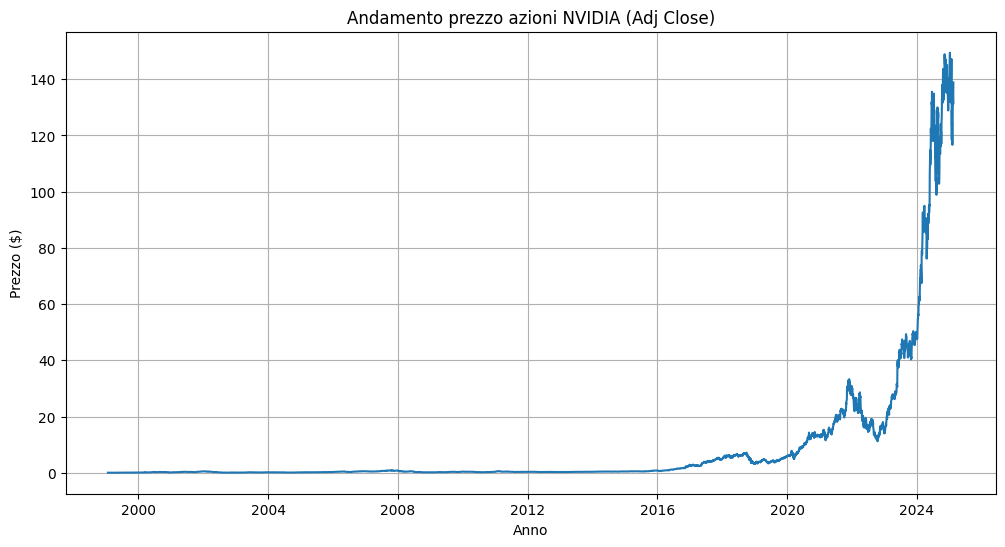

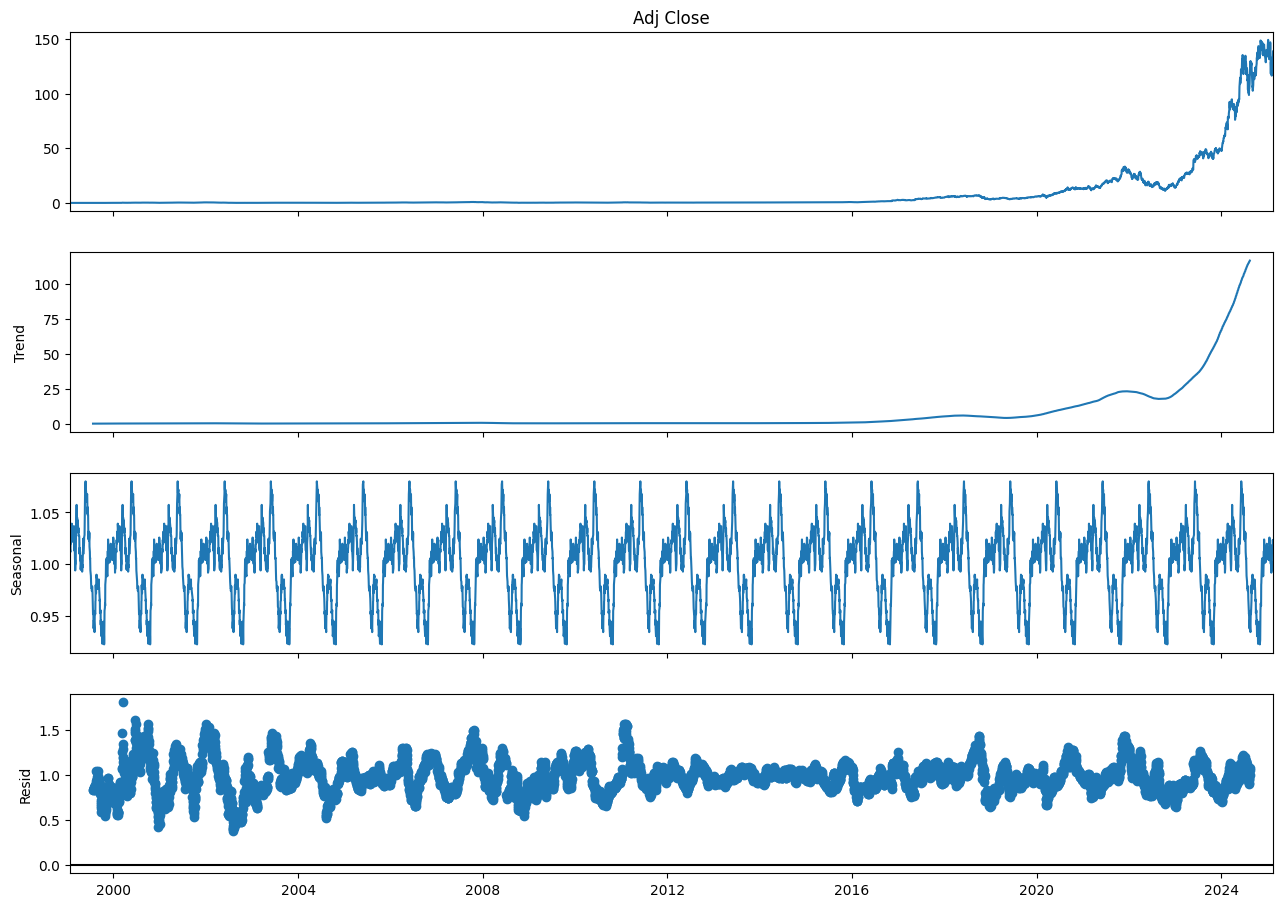

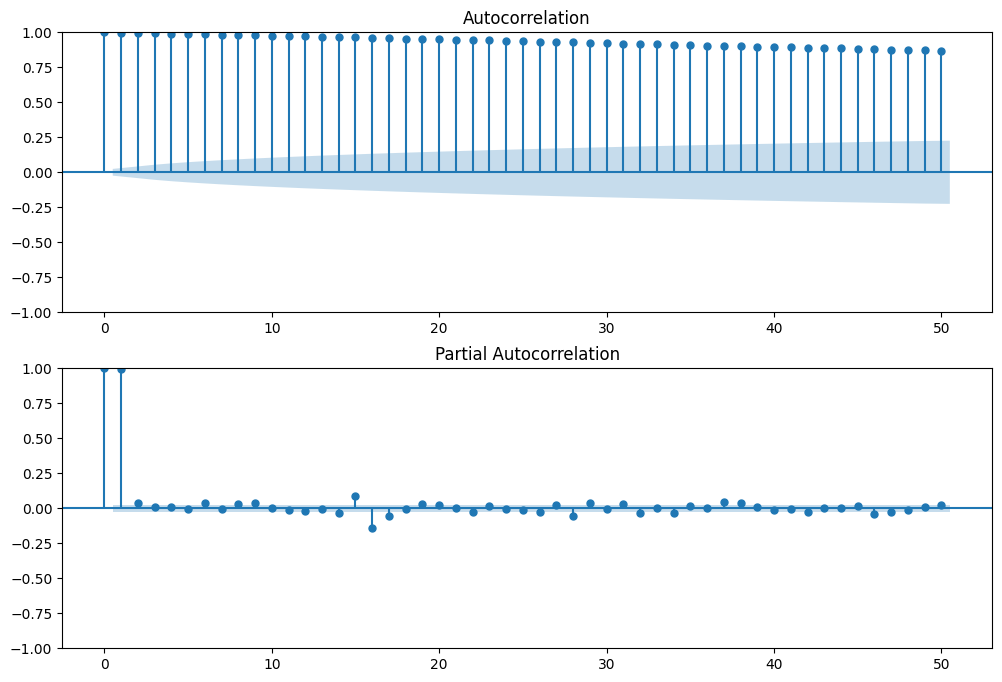

RISULTATI TEST ADF
ADF Statistic: 4.624244228140459
p-value: 1.0
	1%: -3.431353047472829
	5%: -2.861983261289279
	10%: -2.5670059446022853
La serie non è stazionaria (non rifiutiamo l'ipotesi nulla)


In [6]:
# Lavoriamo sulla colonna adj_close (tiene conto di dividendi e stock split)
ts = df['Adj Close']

# Visualizzazione della serie temporale
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Andamento prezzo azioni NVIDIA (Adj Close)')
plt.xlabel('Anno')
plt.ylabel('Prezzo ($)')
plt.grid(True)
plt.show()

# Decomposizione della serie temporale
decomposition = seasonal_decompose(ts, model='multiplicative', period=252)  # 252 giorni di trading in un anno
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

# Automated Correlation Function (ACF) e Partial ACF (PACF)
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(ts, ax=ax[0], lags=50)
plot_pacf(ts, ax=ax[1], lags=50)
plt.show()

# Test di stazionarietà di Dickey-Fuller
print("RISULTATI TEST ADF")
adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f'\t{key}: {value}')

# Interpretazione del test ADF
if adf_result[1] <= 0.05:
    print("La serie è stazionaria (rifiutiamo l'ipotesi nulla)")
else:
    print("La serie non è stazionaria (non rifiutiamo l'ipotesi nulla)")

Un p-value di 1.0 indica che la serie è "perfettamente non stazionaria". Non c'è il minimo dubbio statistico: la serie ha un Trend fortissimo e la media cambia drasticamente nel tempo. Se provassimo a fare previsioni su questi dati così come sono, il modello fallirebbe miseramente.

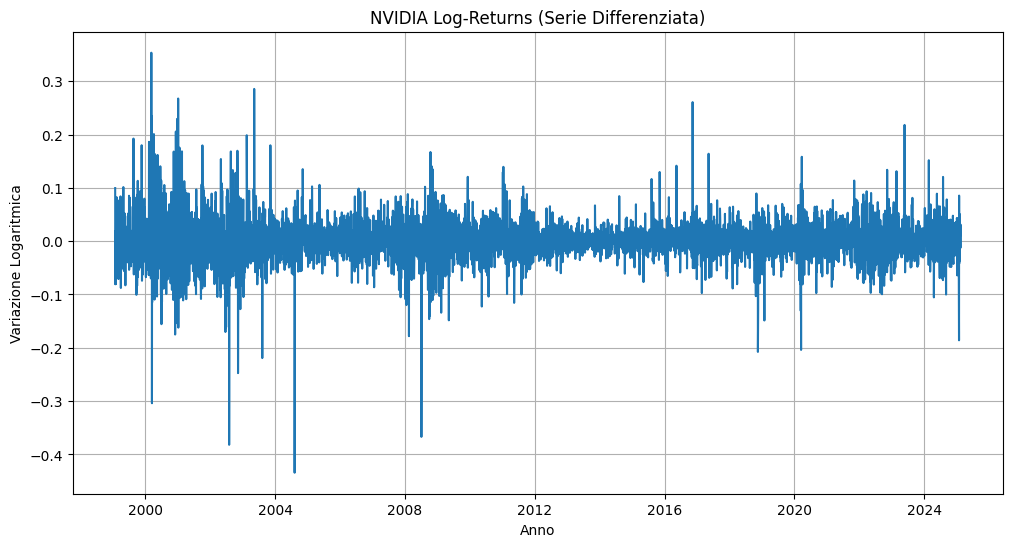


RISULTATI TEST ADF SULLA SERIE DIFFERENZIATA
ADF Statistic: -15.87173646985266
p-value: 8.965383988235893e-29
Critical Values: 
	1%: -3.4313513579179444
	5%: -2.8619825147761264
	10%: -2.567005547217345

CONCLUSIONE: p value < 0.05. La serie è ora stazionaria


In [7]:
# Transformazioni per la stazionarietà
ts_log = np.log(ts)

# Differenziazione
# dropna() è necessario per rimuovere il primo valore NaN generato dalla differenziazione
ts_diff = ts_log.diff().dropna()

# Visualizzazione della serie differenziata
plt.figure(figsize=(12,6))
plt.plot(ts_diff)
plt.title('NVIDIA Log-Returns (Serie Differenziata)')
plt.xlabel('Anno')
plt.ylabel('Variazione Logaritmica')
plt.grid(True)
plt.show()

# Nuovo adf test sulla serie differenziata
print("\nRISULTATI TEST ADF SULLA SERIE DIFFERENZIATA")
result_diff = adfuller(ts_diff)
print(f'ADF Statistic: {result_diff[0]}')
print(f'p-value: {result_diff[1]}')
print('Critical Values: ' )
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

# verifica 
if result_diff[1] < 0.05:
    print("\nCONCLUSIONE: p value < 0.05. La serie è ora stazionaria")
else:
    print("\nATTENZIONE: la serie non è ancora stazionaria.")

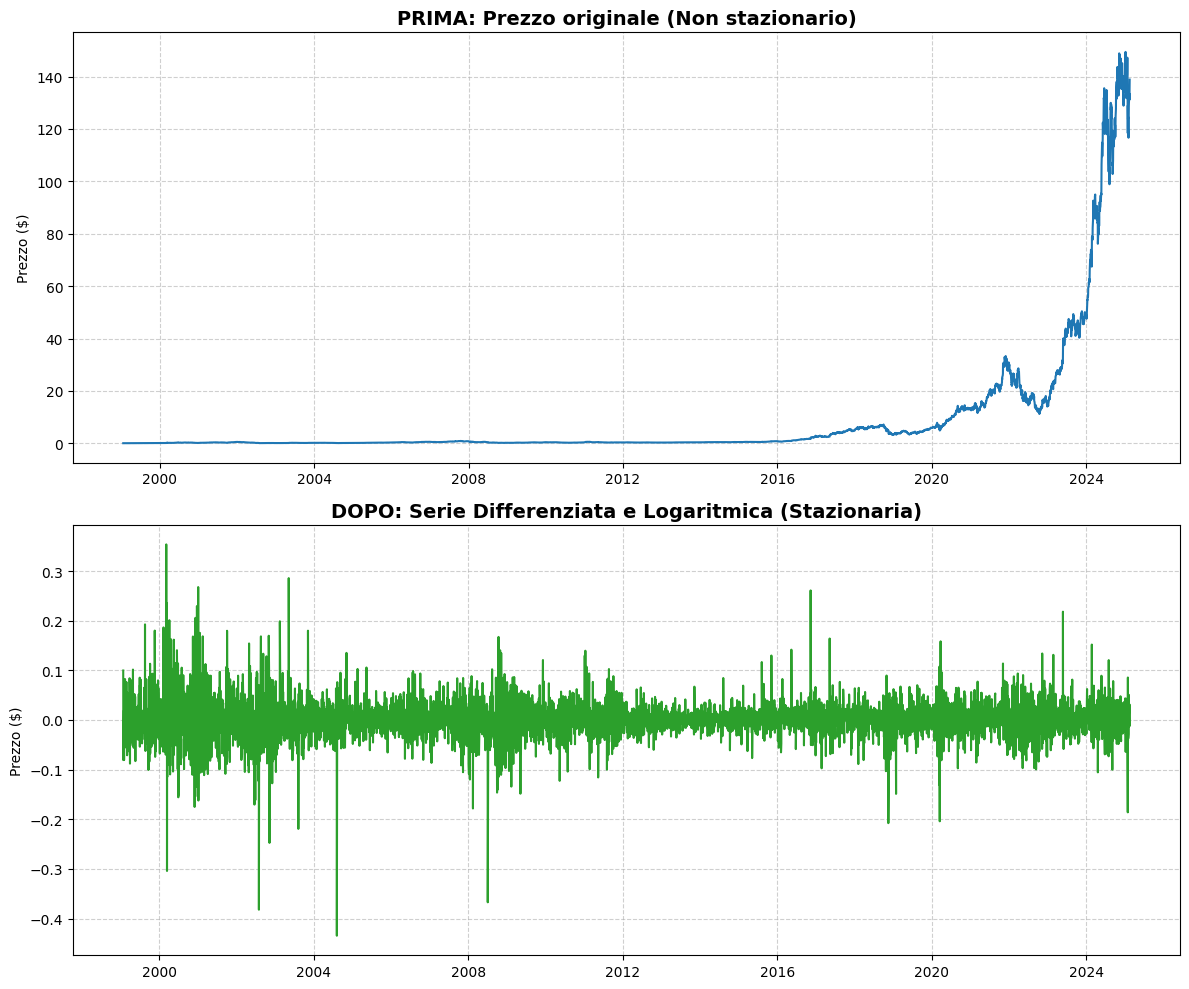

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

# GRAFICO 1: DATI ORIGINALI
ax1.plot(ts, color='#1f77b4')
ax1.set_title('PRIMA: Prezzo originale (Non stazionario)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Prezzo ($)')
ax1.grid(True, linestyle="--", alpha=0.6)

# GRAFICO 2: DATI DIFFERENZIATI
ax2.plot(ts_diff, color='#2ca02c')
ax2.set_title('DOPO: Serie Differenziata e Logaritmica (Stazionaria)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Prezzo ($)')
ax2.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

### DETERMINARE **p** e **q**

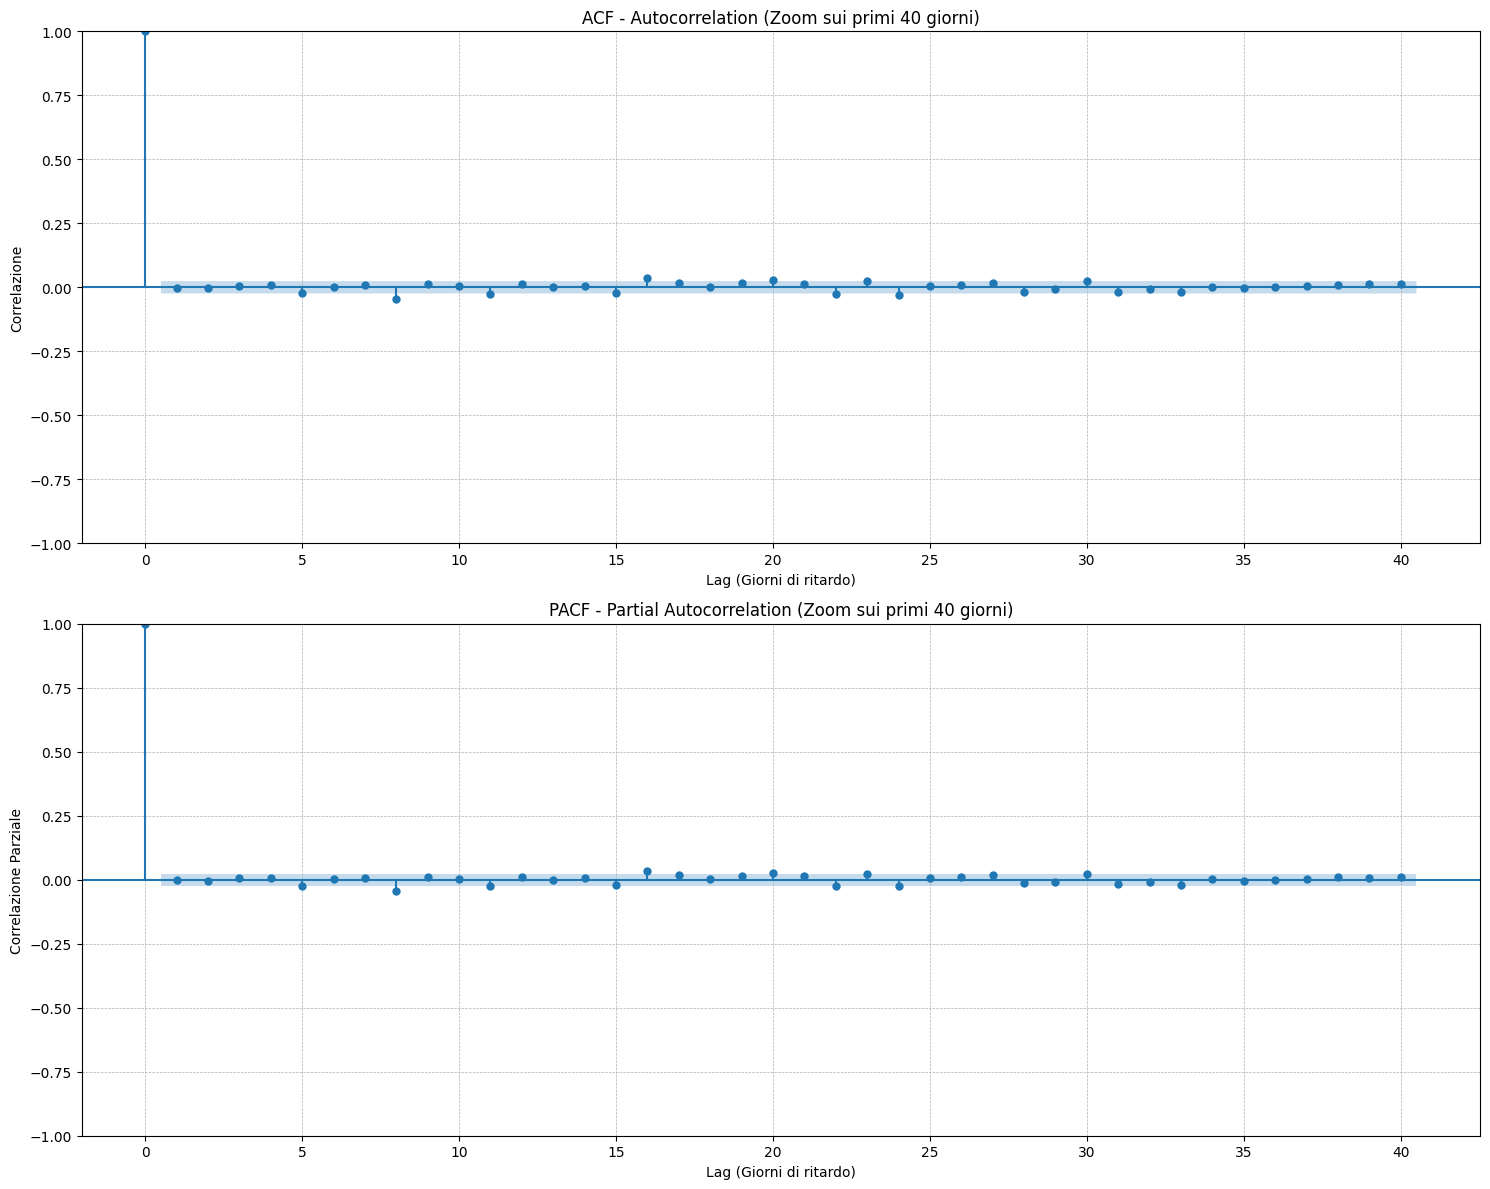

In [9]:
# Impostiamo una figura molto più grande e alta
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. ACF (Autocorrelation) -> Per trovare q
# Limitiamo i lags a 20 per vedere bene i dettagli
plot_acf(ts_diff, ax=ax1, lags=40, title="ACF - Autocorrelation (Zoom sui primi 40 giorni)")
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.set_ylabel('Correlazione')
ax1.set_xlabel('Lag (Giorni di ritardo)')

# 2. PACF (Partial Autocorrelation) -> Per trovare p
plot_pacf(ts_diff, ax=ax2, lags=40, title="PACF - Partial Autocorrelation (Zoom sui primi 40 giorni)")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.set_ylabel('Correlazione Parziale')
ax2.set_xlabel('Lag (Giorni di ritardo)')

plt.tight_layout()
plt.show()

In [10]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

combinazioni = [
    (0, 1, 0), # Random Walk (La tua osservazione visiva)
    (0, 1, 1), # Media Mobile semplice
    (1, 1, 0), # AutoRegressivo semplice
    (1, 1, 1), # Misto (il più standard)
    (2, 1, 2)  # Più complesso
]

print(f"{'MODELLO (p,d,q)':<20} | {'AIC (Minore è meglio)':<25}")
print("-" * 50)

best_aic = float("inf")
best_order = None

for order in combinazioni:
    try:
        #Addestriamo il modello
        #Usiamo ts_log invece di ts_diff perché abbiamo posto d=1
        model = sm.tsa.ARIMA(ts_log, order = order)
        model_fit = model.fit()

        aic_value = model_fit.aic
        print(f"Arima{str(order):<14} | {aic_value:.4f}")

        # Teniamo traccia del vincitore
        if aic_value < best_aic:
            best_aic = aic_value
            best_order = order

    except Exception as e:
        print(f"Arima{order} - Errore: {e}")

print("-" * 50)
print(f"VINCITORE MATEMATICO: ARIMA{best_order}")

MODELLO (p,d,q)      | AIC (Minore è meglio)    
--------------------------------------------------
Arima(0, 1, 0)      | -24385.1625
Arima(0, 1, 1)      | -24383.1701
Arima(1, 1, 0)      | -24383.1748
Arima(1, 1, 1)      | -24381.1624
Arima(2, 1, 2)      | -24404.8953
--------------------------------------------------
VINCITORE MATEMATICO: ARIMA(2, 1, 2)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 6558
Model:                 ARIMA(2, 1, 2)   Log Likelihood               12207.448
Date:                Sat, 15 Nov 2025   AIC                         -24404.895
Time:                        14:21:29   BIC                         -24370.954
Sample:                             0   HQIC                        -24393.161
                               - 6558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5630      0.008    -66.442      0.000      -0.580      -0.546
ar.L2         -0.9756      0.009   -108.789      0.000      -0.993      -0.958
ma.L1          0.5490      0.010     54.447      0.0

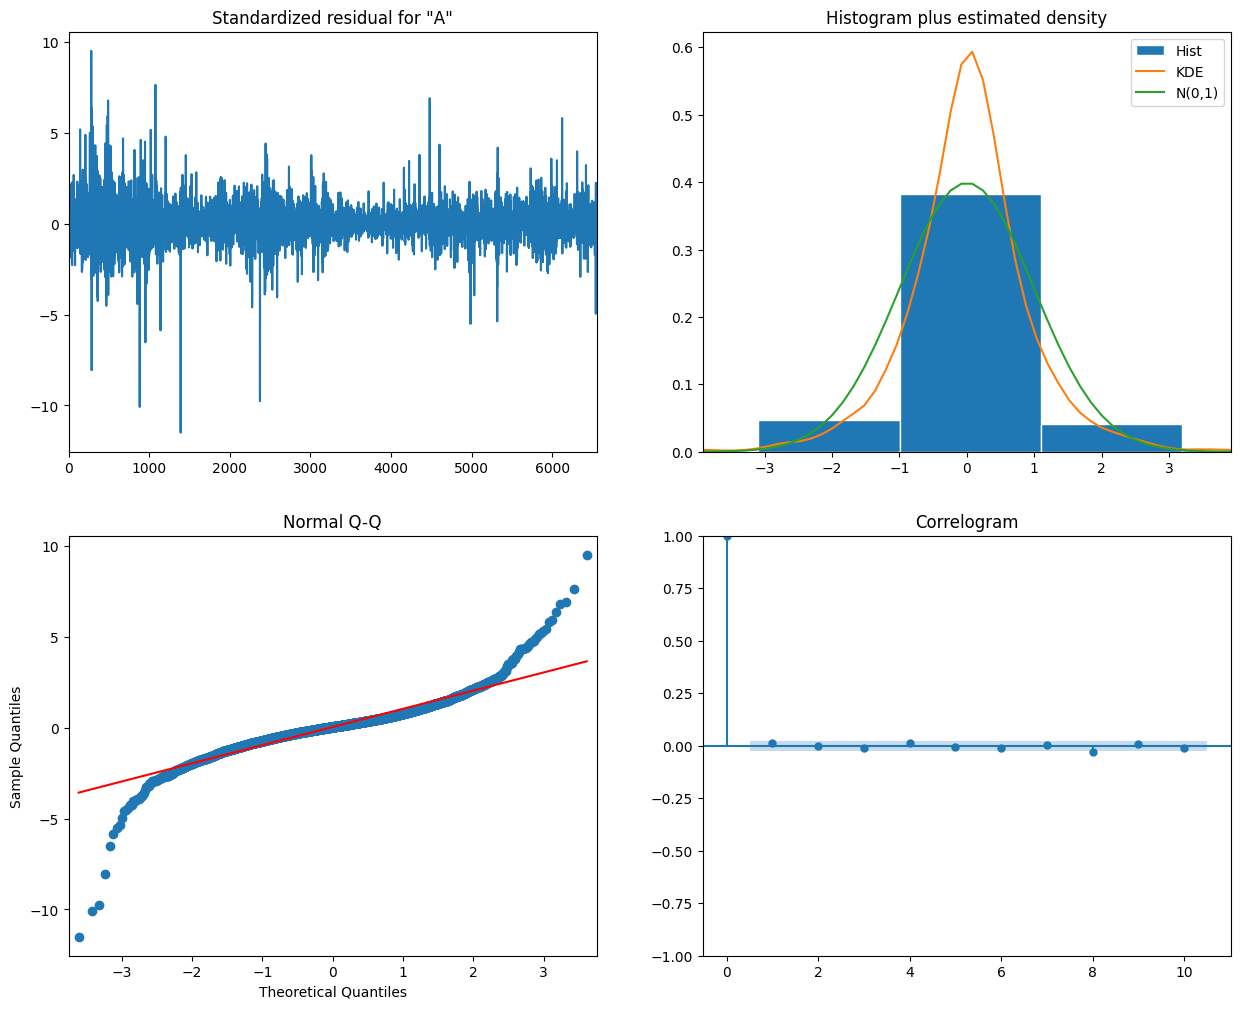

In [11]:
#Addestriamo il modello vincitore
# Usiamo sempre ts_log (il modelo farà la differenza d=1)

model = sm.tsa.ARIMA(ts_log, order=(2,1,2))
results = model.fit()

# Stampiamo il summary
print(results.summary())

# Gradici dei residui
# Ci mostrano se il modello ha catturato tutte le informazioni o ha lasciato qualcosa
results.plot_diagnostics(figsize=(15, 12))
plt.show()

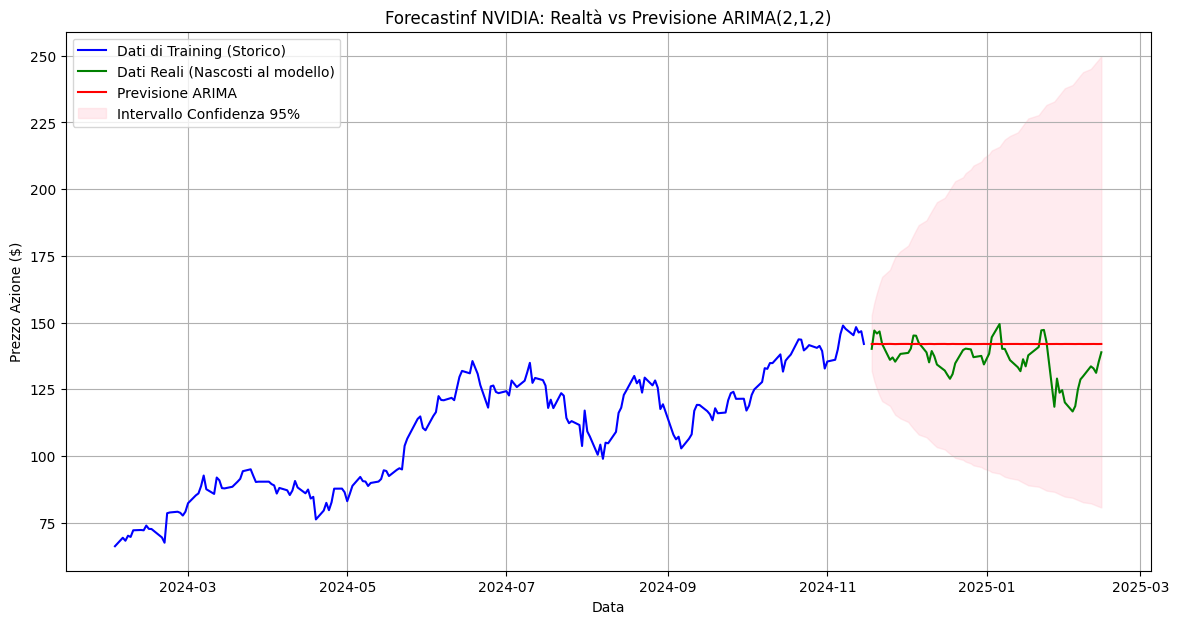


Errore Medio (RMSE): $9.57

Prezzo Ultimo Giorno Reale: $138.85


In [12]:
from sklearn.metrics import mean_squared_error

# Divisione Train / Test
# Teniamo gli ultimi 60 giorni per il test
step_test = 60
train_data = ts_log[:-step_test]
test_data = ts_log[-step_test:]

# Riapplichiamo il modello solo sul train data
model_train = sm.tsa.ARIMA(train_data, order=(2,1,2))
results_train = model_train.fit()

# Forecasting
#Facciamo previsioni per la lunghezza del test set
forecast_result = results_train.get_forecast(steps=step_test)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Riconversione dei logaritmi ai prezzi reali (usiamo l'operatore esponenziale)
train_real = np.exp(train_data)
test_real = np.exp(test_data)
forecast_real = np.exp(forecast_mean)
lower_limits = np.exp(conf_int.iloc[:, 0])
upper_limits = np.exp(conf_int.iloc[:, 1])

# Visualizzazione finale
plt.figure(figsize=(14, 7))

# Mostriamo solo l'ultimo anno per chiarezza

plt.plot(train_real.index[-200:], train_real[-200:], label='Dati di Training (Storico)', color = 'blue')
plt.plot(test_real.index, test_real, label='Dati Reali (Nascosti al modello)', color='green')
plt.plot(test_real.index, forecast_real, label='Previsione ARIMA', color='red')

#Area di confidenza (Intervallo di incertezza al 95%)
plt.fill_between(test_real.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Intervallo Confidenza 95%')

plt.title('Forecastinf NVIDIA: Realtà vs Previsione ARIMA(2,1,2)')
plt.xlabel('Data')
plt.ylabel('Prezzo Azione ($)')
plt.legend()
plt.grid()
plt.show()

# Calcolo Errore (RMSE)
mse = mean_squared_error(test_real, forecast_real)
rmse = np.sqrt(mse)
print(f"\nErrore Medio (RMSE): ${rmse:.2f}")
print(f"\nPrezzo Ultimo Giorno Reale: ${test_real.iloc[-1]:.2f}")

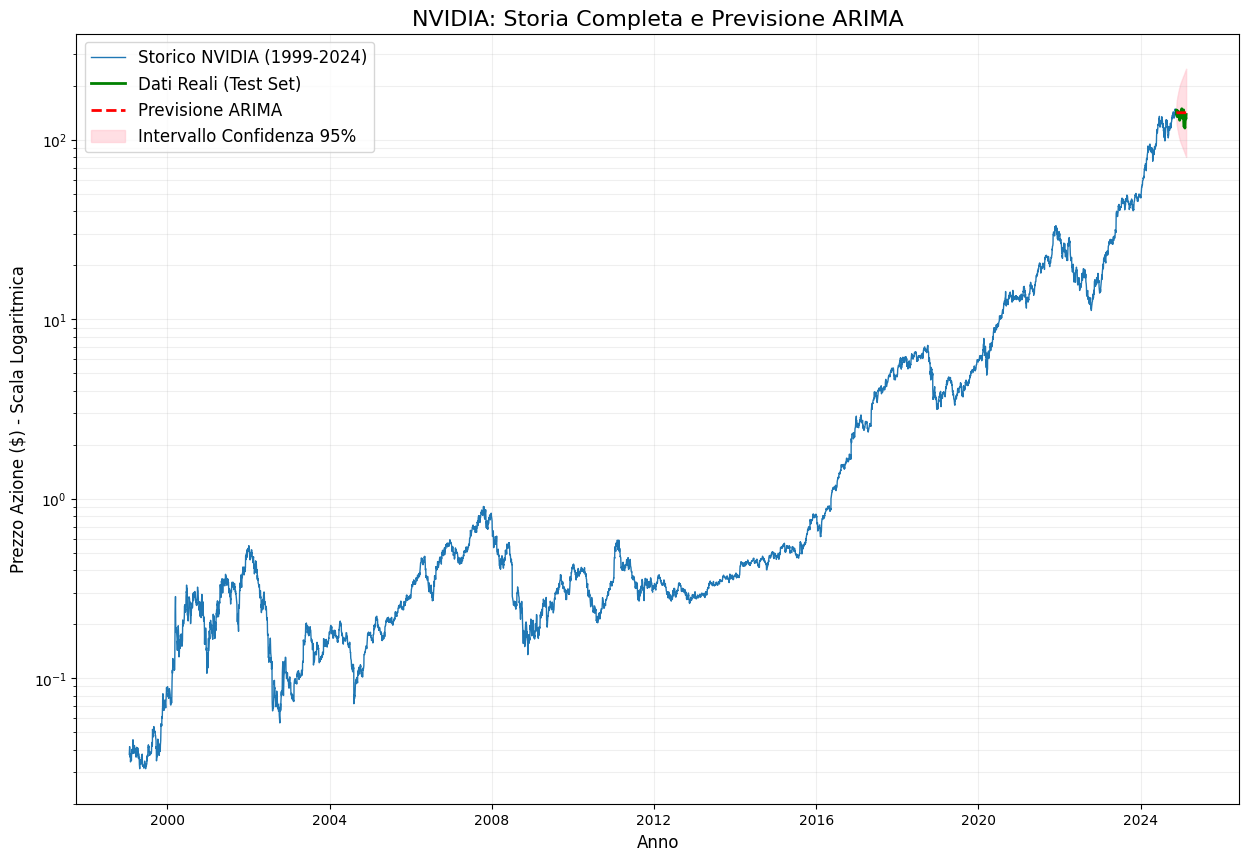

In [13]:
# --- GRAFICO COMPLETO (1999-2025) ---
plt.figure(figsize=(15, 10))

# 1. Plot dei dati storici (Tutto il dataset, senza filtri)
plt.plot(train_real.index, train_real, label='Storico NVIDIA (1999-2024)', color='#1f77b4', linewidth=1)

# 2. Plot dei dati recenti (Realtà vs Previsione)
plt.plot(test_real.index, test_real, label='Dati Reali (Test Set)', color='green', linewidth=2)
plt.plot(test_real.index, forecast_real, label='Previsione ARIMA', color='red', linestyle='--', linewidth=2)

# 3. Intervallo di confidenza
plt.fill_between(test_real.index, lower_limits, upper_limits, color='pink', alpha=0.5, label='Intervallo Confidenza 95%')

# --- IL TRUCCO: SCALA LOGARITMICA ---
# Decommenta la riga sotto se vuoi vedere bene l'andamento storico
plt.yscale('log') 
plt.ylabel('Prezzo Azione ($) - Scala Logaritmica', fontsize=12)
# Se invece vuoi la scala normale (lineare), commenta la riga sopra e usa questa:
# plt.ylabel('Prezzo Azione ($)', fontsize=12)

plt.title('NVIDIA: Storia Completa e Previsione ARIMA', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.2) # Griglia più fitta per la scala log

plt.show()

### TEST 3 ANNI ARIMA

Addestramento del modello sui dati fino al: 2022-02-09
Previsione sui successivi 756 giorni (fino al 2025-02-14)...


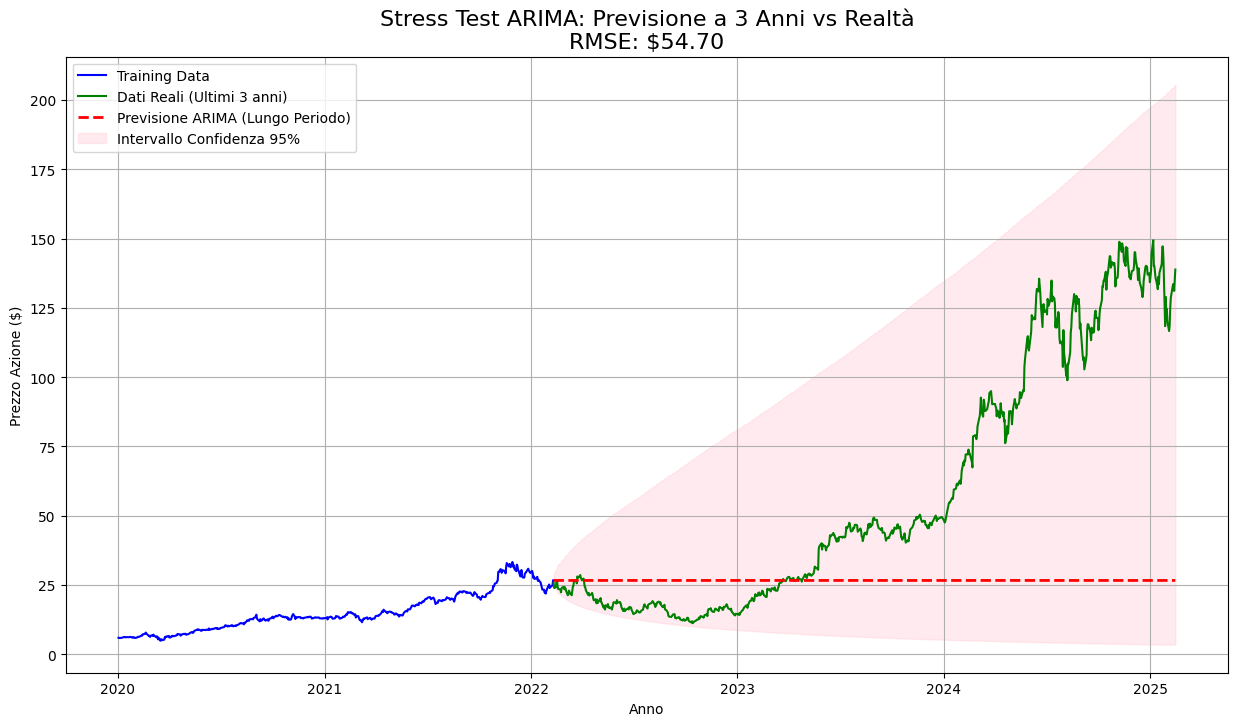

MSE su 3 anni: $2991.88
RMSE su 3 anni: $54.70


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 1. Setup Dati
df = pd.read_csv('data/raw/nvidia/NVDA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
ts_log = np.log(df['Adj Close'])

# 2. Impostazione Orizzonte Temporale Lungo (Stress Test)
# 252 giorni lavorativi * 3 anni = 756 giorni
steps_test = 756 

# Divisione Train (Passato) / Test (Ultimi 3 anni)
train_data = ts_log[:-steps_test]
test_data = ts_log[-steps_test:]

print(f"Addestramento del modello sui dati fino al: {train_data.index[-1].date()}")
print(f"Previsione sui successivi {steps_test} giorni (fino al {test_data.index[-1].date()})...")

# 3. Training ARIMA(2, 1, 2)
# Nota: Su orizzonti lunghi, il modello impiegherà un po' di più a convergere
model = sm.tsa.ARIMA(train_data, order=(2, 1, 2))
results = model.fit()

# 4. Forecasting a Lungo Termine
forecast_result = results.get_forecast(steps=steps_test)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 5. Riconversione in Dollari (Exp)
train_real = np.exp(train_data)
test_real = np.exp(test_data)
forecast_real = np.exp(forecast_mean)
lower_limits = np.exp(conf_int.iloc[:, 0])
upper_limits = np.exp(conf_int.iloc[:, 1])

# 6. Calcolo RMSE
mse = mean_squared_error(test_real, forecast_real)
rmse = np.sqrt(mse)

# 7. Visualizzazione
plt.figure(figsize=(15, 8))

# Mostriamo solo gli ultimi 5-6 anni per vedere bene il confronto
start_plot_date = '2020-01-01' 
mask_train = train_real.index > start_plot_date

plt.plot(train_real[mask_train].index, train_real[mask_train], label='Training Data', color='blue')
plt.plot(test_real.index, test_real, label='Dati Reali (Ultimi 3 anni)', color='green')
plt.plot(test_real.index, forecast_real, label='Previsione ARIMA (Lungo Periodo)', color='red', linestyle='--', linewidth=2)

# Area di confidenza
plt.fill_between(test_real.index, lower_limits, upper_limits, color='pink', alpha=0.3, label='Intervallo Confidenza 95%')

plt.title(f'Stress Test ARIMA: Previsione a 3 Anni vs Realtà\nRMSE: ${rmse:.2f}', fontsize=16)
plt.xlabel('Anno')
plt.ylabel('Prezzo Azione ($)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

print(f"MSE su 3 anni: ${mse:.2f}")
print(f"RMSE su 3 anni: ${rmse:.2f}")

### SARIMAX

Addestramento SARIMAX(2,1,2) con volume in corso...

RISULTATI CONFROTNO (Orizzonte 60 giorni)
RMSE ARIMA (Solo Prezzo): $9,57
RMSE SARIMAXE (Prezzo + Vol): $9.64
--------------------------------------------------
P-value del Volume: 0.0000
CONCLUSIONE: Il Volume è SIGNIFICATIVO! Aiuta a migliorare la stima.


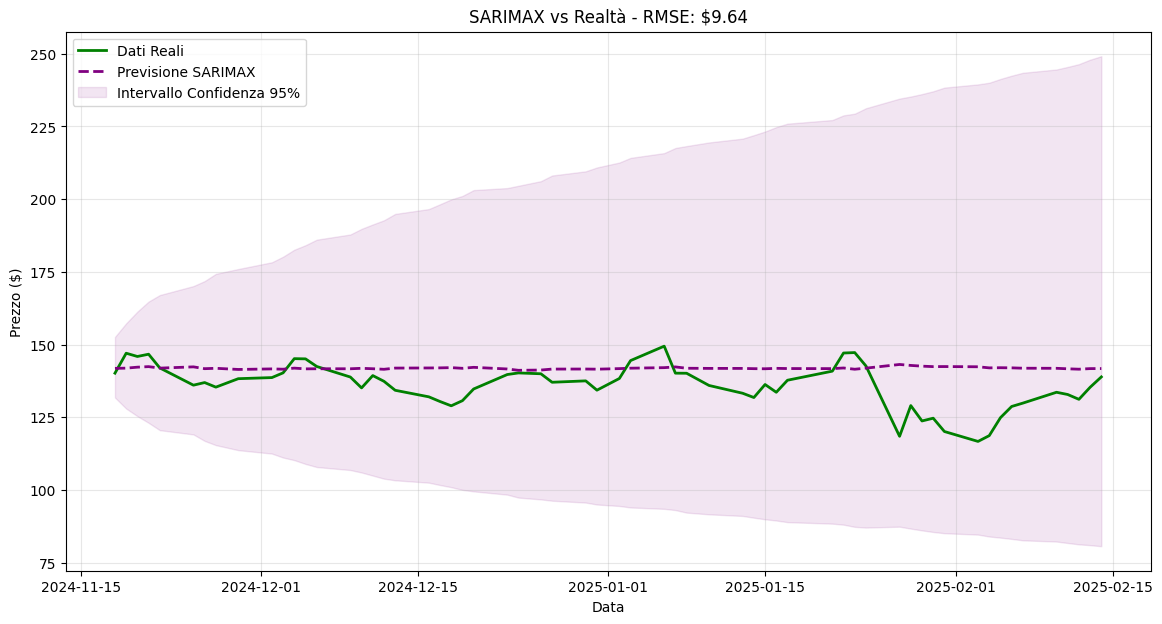

In [15]:
# Preparazione delle variabili 
# Y = Target (Prezzo)
ts_log = np.log(df['Adj Close'])

# X = Variabile Esogena (Volume)
# Usiamo anche qui il logaritmo per ridurre la scala
exog_log = np.log(df['Volume'])

# Divisione Train / Test (60 giorni)
steps_test_ = 60

# Dati di Training
train_endog = ts_log[:-steps_test_]
train_exog = exog_log[:-steps_test_]    

# Dati di Test
test_endog = ts_log[-steps_test_:]  
test_exog = exog_log[-steps_test_:]    # Volume futuro (in uno scenario reale dovremmo stimarlo, qui usiamo quello vero per testare la potenza del modello)

print("Addestramento SARIMAX(2,1,2) con volume in corso...")

# Configurazione e train del modello
model_sarimax = sm.tsa.SARIMAX(train_endog,
                               exog=train_exog,
                               order=(2,1,2),
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results_sarimax = model_sarimax.fit(disp=False)

# Forecasting
# Per prevedere X, dobbiamo fornirgli le X future
forecast_result = results_sarimax.get_forecast(steps=steps_test_, exog=test_exog)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Riconversione in dollari ($)
test_real = np.exp(test_endog)
forecast_real = np.exp(forecast_mean)
lower_limit = np.exp(conf_int.iloc[:, 0])
upper_limit = np.exp(conf_int.iloc[:, 1])

# Calcolo Errore e Analisi
mse_sarimax = mean_squared_error(test_real, forecast_real)
rmse_sarimax = np.sqrt(mse_sarimax)

# Verifichiamo se il Volume è statisticamente utile
p_value_volume = results_sarimax.pvalues['Volume']

print("\n" + "="*50)
print(f"RISULTATI CONFROTNO (Orizzonte 60 giorni)")
print("="*50)
print(f"RMSE ARIMA (Solo Prezzo): $9,57")
print(f"RMSE SARIMAXE (Prezzo + Vol): ${rmse_sarimax:.2f}")
print("-"*50)
print(f"P-value del Volume: {p_value_volume:.4f}")

if p_value_volume < 0.05:
    print("CONCLUSIONE: Il Volume è SIGNIFICATIVO! Aiuta a migliorare la stima.")
else:
    print("CONCLUSIONE: Il Volume NON è significativo (è rumore statistico per questo modello).")

# Grafico Finale
plt.figure(figsize=(14,7))
plt.plot(test_real.index, test_real, label='Dati Reali', color='green', linewidth=2)
plt.plot(test_real.index, forecast_real, label='Previsione SARIMAX', color='purple', linestyle='--', linewidth=2)
plt.fill_between(test_real.index, lower_limit, upper_limit, color='purple', alpha=0.1, label='Intervallo Confidenza 95%')
plt.title(f'SARIMAX vs Realtà - RMSE: ${rmse_sarimax:.2f}')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

testiamo sarimax con un orizzonte temporale più ampio

--- STRESS TEST SARIMAX (3 ANNI) ---
Addestramento fino al: 2022-02-09
Previsione dal 2022-02-10 al 2025-02-14

RISULTATI SARIMAX (Lungo Periodo)
RMSE (3 Anni):      $54.75
ARIMA era:          $54.70
--------------------------------------------------
Coefficiente Volume: 0.0073
P-value Volume:      0.0000
VERDETTO: Anche col Volume, il modello non regge il lungo periodo.


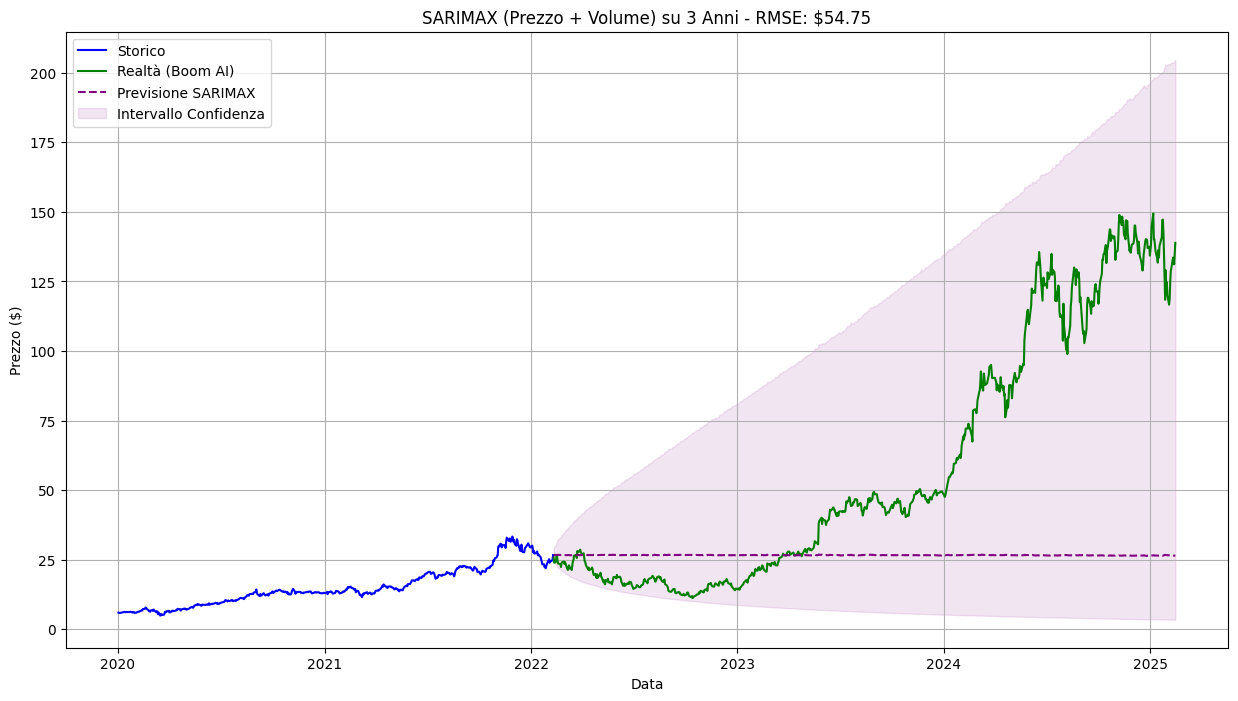

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 1. Setup Dati
df = pd.read_csv('data/raw//nvidia/NVDA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Variabili in scala Logaritmica
ts_log = np.log(df['Adj Close'])
exog_log = np.log(df['Volume'])

# 2. Impostazione Orizzonte Lungo (3 Anni)
steps_test = 756 

# Divisione Train / Test per entrambe le variabili
train_endog = ts_log[:-steps_test]
test_endog = ts_log[-steps_test:]

train_exog = exog_log[:-steps_test]
test_exog = exog_log[-steps_test:] # Volume "futuro" reale per il test

print(f"--- STRESS TEST SARIMAX (3 ANNI) ---")
print(f"Addestramento fino al: {train_endog.index[-1].date()}")
print(f"Previsione dal {test_endog.index[0].date()} al {test_endog.index[-1].date()}")

# 3. Training SARIMAX(2, 1, 2) + Volume
# Nota: 'enforce_stationarity=False' aiuta il modello a convergere su periodi lunghi
model = sm.tsa.SARIMAX(train_endog, 
                       exog=train_exog,
                       order=(2, 1, 2),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results = model.fit(disp=False)

# 4. Forecasting
forecast_result = results.get_forecast(steps=steps_test, exog=test_exog)
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# 5. Riconversione in Dollari ($)
train_real = np.exp(train_endog)
test_real = np.exp(test_endog)
forecast_real = np.exp(forecast_mean)
lower_limits = np.exp(conf_int.iloc[:, 0])
upper_limits = np.exp(conf_int.iloc[:, 1])

# 6. Calcolo Errore
mse = mean_squared_error(test_real, forecast_real)
rmse = np.sqrt(mse)

# 7. Analisi del Volume sul lungo periodo
p_value_vol = results.pvalues['Volume']
coef_vol = results.params['Volume']

print("\n" + "="*50)
print(f"RISULTATI SARIMAX (Lungo Periodo)")
print("="*50)
print(f"RMSE (3 Anni):      ${rmse:.2f}")
print(f"ARIMA era:          $54.70") 
print("-" * 50)
print(f"Coefficiente Volume: {coef_vol:.4f}")
print(f"P-value Volume:      {p_value_vol:.4f}")

if rmse < 54.70:
    print("VERDETTO: Il SARIMAX batte l'ARIMA sul lungo periodo!")
else:
    print("VERDETTO: Anche col Volume, il modello non regge il lungo periodo.")

# 8. Grafico
plt.figure(figsize=(15, 8))
# Mostriamo dal 2020 in poi
start_plot = '2020-01-01'
mask = train_real.index > start_plot

plt.plot(train_real[mask].index, train_real[mask], label='Storico', color='blue')
plt.plot(test_real.index, test_real, label='Realtà (Boom AI)', color='green')
plt.plot(test_real.index, forecast_real, label='Previsione SARIMAX', color='purple', linestyle='--')
plt.fill_between(test_real.index, lower_limits, upper_limits, color='purple', alpha=0.1, label='Intervallo Confidenza')

plt.title(f'SARIMAX (Prezzo + Volume) su 3 Anni - RMSE: ${rmse:.2f}')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True)
plt.show()

Analisi del periodo PRE-AI (Dati fino al 2022-11-01)
Totale osservazioni storiche: 5984
Training set: fino al 2022-08-05
Test set (da prevedere): dal 2022-08-08 al 2022-10-31

RISULTATI BACKTEST (Epoca Pre-AI)
RMSE (Errore in $):   $5.35
P-value Volume:      0.0000


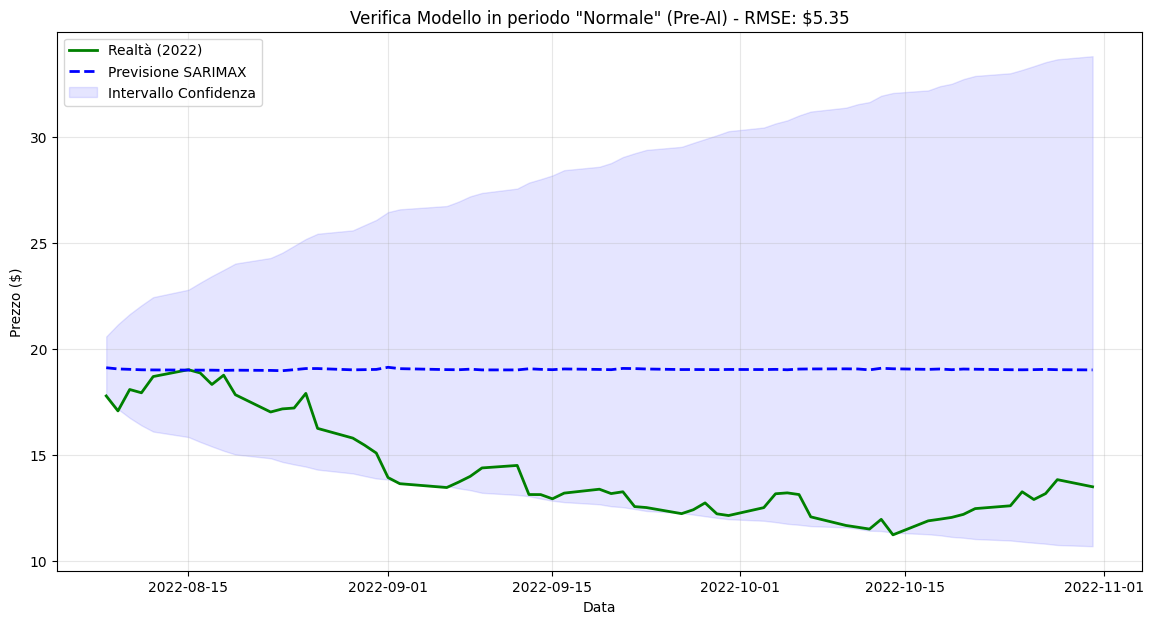

--- CONTROLLO VALORI PREVISIONE ---
Primi 5 valori previsti:
5924    2.949719
5925    2.946773
5926    2.945769
5927    2.944640
5928    2.944280
Name: predicted_mean, dtype: float64

Ultimi 5 valori previsti:
5979    2.944646
5980    2.945033
5981    2.945691
5982    2.944867
5983    2.944363
Name: predicted_mean, dtype: float64

--- CONTROLLO TARGET REALE ---
Date
2022-08-08    17.770239
2022-08-09    17.064142
2022-08-10    18.073851
2022-08-11    17.919046
2022-08-12    18.685064
Name: Adj Close, dtype: float64
Date
2022-10-25    13.247972
2022-10-26    12.883329
2022-10-27    13.163056
2022-10-28    13.820409
2022-10-31    13.483741
Name: Adj Close, dtype: float64


In [20]:
# --- STRESS TEST: BACKTESTING "PRE-AI ERA" ---

# 1. Definizione del periodo "Pre-AI"
# Tagliamo il dataset prima dell'esplosione dell'AI (diciamo prima del 2023)
cutoff_date = '2022-11-01'  # Data simbolica (rilascio ChatGPT)
df_pre_ai = df[df.index < cutoff_date].copy()

print(f"Analisi del periodo PRE-AI (Dati fino al {cutoff_date})")
print(f"Totale osservazioni storiche: {len(df_pre_ai)}")

# 2. Preparazione Variabili (Log-Trasformazione)
ts_log_pre = np.log(df_pre_ai['Adj Close'])
exog_log_pre = np.log(df_pre_ai['Volume'])

# 3. Divisione Train / Test (Ultimi 60 giorni del periodo Pre-AI)
steps_test = 60

train_endog = ts_log_pre[:-steps_test]
test_endog = ts_log_pre[-steps_test:]

train_exog = exog_log_pre[:-steps_test]
test_exog = exog_log_pre[-steps_test:]

print(f"Training set: fino al {train_endog.index[-1].date()}")
print(f"Test set (da prevedere): dal {test_endog.index[0].date()} al {test_endog.index[-1].date()}")

# 4. Training SARIMAX(2,1,2) con Volume
model_pre = sm.tsa.SARIMAX(train_endog, 
                           exog=train_exog, 
                           order=(2, 1, 2),
                           enforce_stationarity=False, 
                           enforce_invertibility=False)

results_pre = model_pre.fit(disp=False)

# 5. Forecasting
forecast_res = results_pre.get_forecast(steps=steps_test, exog=test_exog)
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# 6. Riconversione in Dollari ($)
test_real = np.exp(test_endog)
forecast_real = np.exp(forecast_mean)
lower_limits = np.exp(conf_int.iloc[:, 0])
upper_limits = np.exp(conf_int.iloc[:, 1])

# 7. Calcolo Errore
rmse_pre = np.sqrt(mean_squared_error(test_real, forecast_real))
p_vol_pre = results_pre.pvalues['Volume']

print("\n" + "="*50)
print(f"RISULTATI BACKTEST (Epoca Pre-AI)")
print("="*50)
print(f"RMSE (Errore in $):   ${rmse_pre:.2f}")
print(f"P-value Volume:      {p_vol_pre:.4f}")

# 8. Grafico
plt.figure(figsize=(14, 7))
plt.plot(test_real.index, test_real, label='Realtà (2022)', color='green', linewidth=2)
plt.plot(test_real.index, forecast_real, label='Previsione SARIMAX', color='blue', linestyle='--', linewidth=2)
plt.fill_between(test_real.index, lower_limits, upper_limits, color='blue', alpha=0.1, label='Intervallo Confidenza')
plt.title(f'Verifica Modello in periodo "Normale" (Pre-AI) - RMSE: ${rmse_pre:.2f}')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("--- CONTROLLO VALORI PREVISIONE ---")
print("Primi 5 valori previsti:")
print(forecast_mean.head())
print("\nUltimi 5 valori previsti:")
print(forecast_mean.tail())

print("\n--- CONTROLLO TARGET REALE ---")
print(test_real.head())
print(test_real.tail())

### SARIMAX CON MEDIA MOBILE

--- TEST SARIMAX con MEDIA MOBILE (SMA 50) ---

RISULTATI (Lungo Periodo - 3 Anni)
RMSE (Con SMA 50):     $52.77
RMSE (Precedente):     $54.70
--------------------------------------------------
P-value SMA:           0.1843


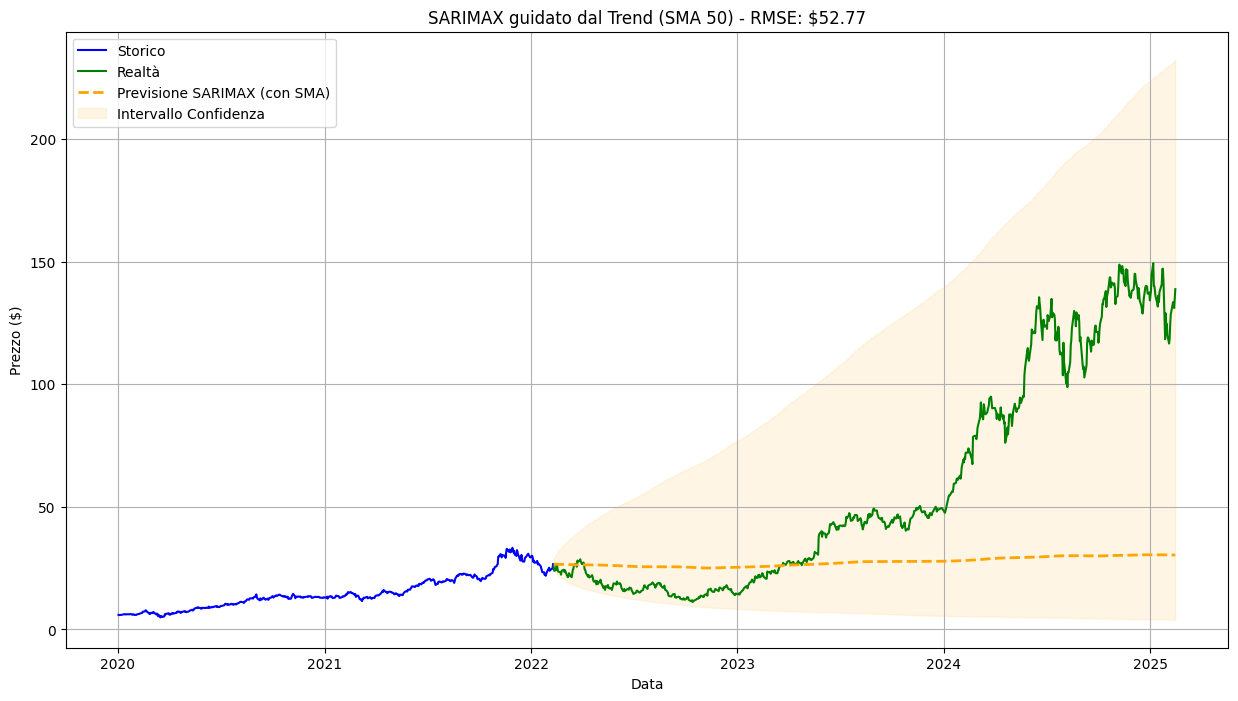

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# 1. Ricarichiamo i dati per pulizia
df = pd.read_csv('data/raw/nvidia/NVDA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Variabile Target (Log-Price)
ts_log = np.log(df['Adj Close'])

# 2. CREAZIONE NUOVA FEATURE: Media Mobile a 50 giorni (SMA)
# La calcoliamo sui prezzi logaritmici per coerenza
# shift(1) è fondamentale: usiamo la media di IERI per prevedere OGGI (altrimenti bareremmo guardando il futuro)
df['SMA_50'] = ts_log.rolling(window=50).mean().shift(1)

# Rimuoviamo i primi 50 giorni che ora sono NaN
df_clean = df.dropna()
ts_log = ts_log.loc[df_clean.index]
exog_sma = df_clean['SMA_50']

# 3. Divisione Train / Test (Testiamo sul lungo periodo: 3 Anni)
steps_test = 756 

train_endog = ts_log[:-steps_test]
test_endog = ts_log[-steps_test:]

train_exog = exog_sma[:-steps_test]
test_exog = exog_sma[-steps_test:]

print(f"--- TEST SARIMAX con MEDIA MOBILE (SMA 50) ---")

# 4. Training
# Usiamo la SMA come variabile esterna
model_sma = sm.tsa.SARIMAX(train_endog, 
                           exog=train_exog, 
                           order=(2, 1, 2),
                           enforce_stationarity=False, 
                           enforce_invertibility=False)

results_sma = model_sma.fit(disp=False)

# 5. Forecasting
forecast_res = results_sma.get_forecast(steps=steps_test, exog=test_exog)
forecast_mean = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# 6. Riconversione in $
test_real = np.exp(test_endog)
forecast_real = np.exp(forecast_mean)
lower_limits = np.exp(conf_int.iloc[:, 0])
upper_limits = np.exp(conf_int.iloc[:, 1])

# 7. Valutazione
mse_sma = mean_squared_error(test_real, forecast_real)
rmse_sma = np.sqrt(mse_sma)
p_val_sma = results_sma.pvalues['SMA_50']

print("\n" + "="*50)
print(f"RISULTATI (Lungo Periodo - 3 Anni)")
print("="*50)
print(f"RMSE (Con SMA 50):     ${rmse_sma:.2f}")
print(f"RMSE (Precedente):     $54.70") 
print("-" * 50)
print(f"P-value SMA:           {p_val_sma:.4f}")

# 8. Grafico
plt.figure(figsize=(15, 8))
start_plot = '2020-01-01'
mask = train_real.index > start_plot # Usiamo train_real del blocco precedente per il plot storico se disponibile, altrimenti ricalcolalo

# Ricalcolo rapido storico per il plot
train_real_plot = np.exp(train_endog[train_endog.index > start_plot])

plt.plot(train_real_plot.index, train_real_plot, label='Storico', color='blue')
plt.plot(test_real.index, test_real, label='Realtà', color='green')
plt.plot(test_real.index, forecast_real, label='Previsione SARIMAX (con SMA)', color='orange', linestyle='--', linewidth=2)
plt.fill_between(test_real.index, lower_limits, upper_limits, color='orange', alpha=0.1, label='Intervallo Confidenza')

plt.title(f'SARIMAX guidato dal Trend (SMA 50) - RMSE: ${rmse_sma:.2f}')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True)
plt.show()